# Assignment #3 - Neural Networks

### <font color="red"> DUE: Nov 12 (Tuesday) 11:00 pm </font>  

<font color="blue"> Gopal Sharma </font>

# I. Overview

The objective of the assignment is to use NeuralNet class for regression and implement on regression data used in assignment 1. I will be explaining 5-fold cross validation and will be finding a good neural network and reporting the CV accuracies. I will be summarising the non linear regression model. I will also be summarising nonlinear logistic regression model and will be completing the nonlinear logistic regression class code. I will be applying this code on my classification data.

# II. Data

The dataset is taken from the repository of Kaggle. 
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019. This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

1. id, the listing ids
2. name, Name of the listing
3. host_id, id of the host
4. host_name, name of the host
5. neighbourhood_group, location of the listing
6. neighbourhood, area of the location
7. latitude, coordinates of the location
8. longitude, coordinates of the location
9. room_type, listing space type
10. price, price in dollars
11. minimum_nights, amount of nights minimum
12. number_of_reviews, # of reviews for the location
13. last_review, latest review of the location
14. reviews_per_month, # of reviews per month
15. calculated_host_listings_count, amount of listing per host
16. availability_365, number of days when listing is available for booking

In [234]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 9.0)

In [235]:
df= pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [236]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [237]:
df.drop(['id','name','host_name','neighbourhood','last_review'], axis=1, inplace=True)
df.head(5)

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [238]:
# Replacing NaN values with 0
df.fillna({'reviews_per_month':0}, inplace=True)

In [239]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['room_type'])
df['room_type']=le.transform(df['room_type'])
le.fit(df['neighbourhood_group'])
df['neighbourhood_group']=le.transform(df['neighbourhood_group'])

In [240]:
df.head()

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,1,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2845,2,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,4632,2,40.80902,-73.94190,1,150,3,0,0.00,1,365
3,4869,1,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,7192,2,40.79851,-73.94399,0,80,10,9,0.10,1,0


In [241]:
df_target=pd.DataFrame(df.iloc[:,5])
df_target.shape

(48895, 1)

In [242]:
df.shape

(48895, 11)

### Plots to visualize the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B12CBB358>,
      dtype=object)

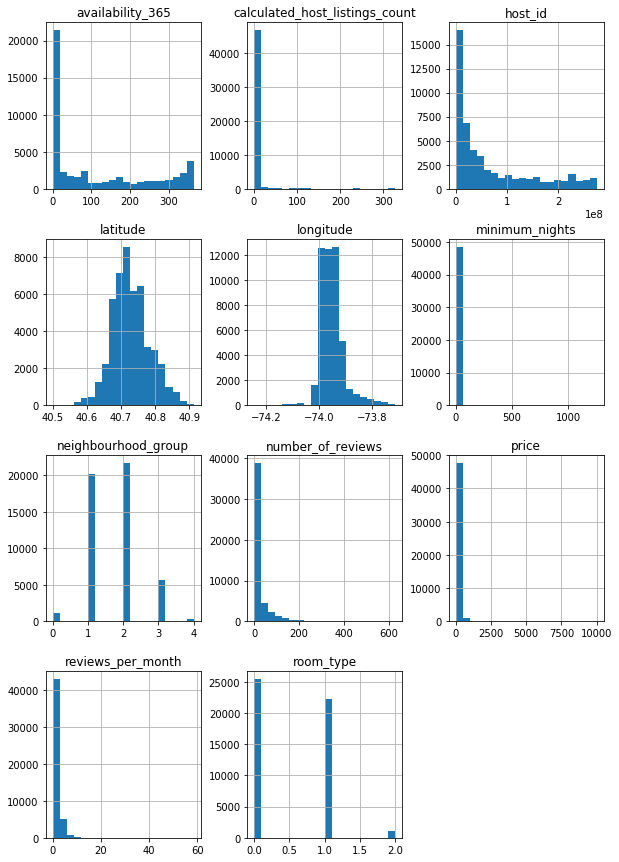

In [243]:
df.hist(bins = 20 , figsize= (10,15))

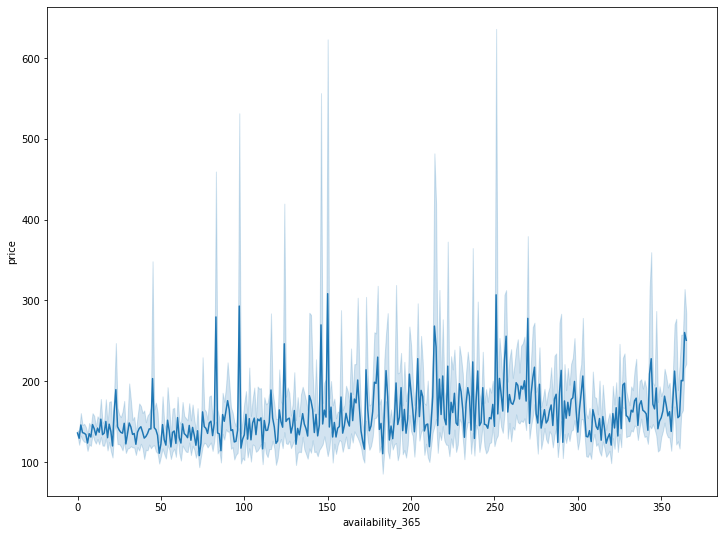

In [244]:
sns.lineplot(x='availability_365',y='price',data=df)
plt.show()

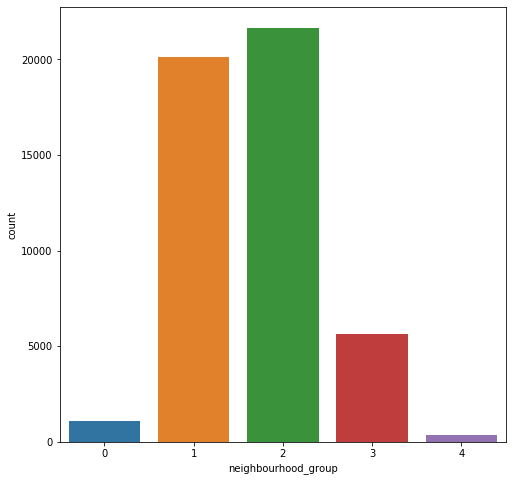

In [245]:
plt.figure(figsize=(8,8))
axis = sns.countplot(df["neighbourhood_group"])

This plot signifies that the majority of the listings of AirBnB are in Brooklyn and Manhattan.

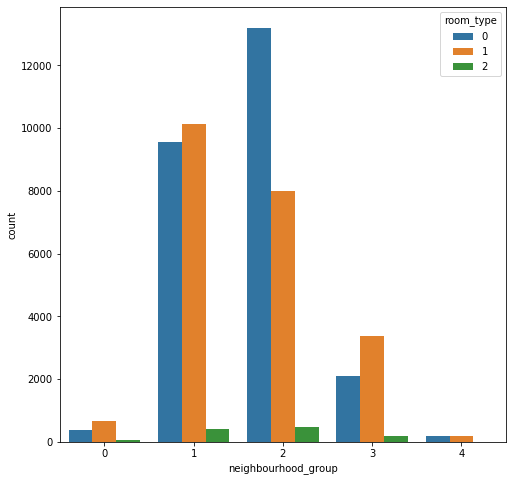

In [246]:
plt.figure(figsize=(8,8))
a = sns.countplot(df['neighbourhood_group'],hue=df['room_type'])

The above plot signifies that the Entire Home/Apartment are listed near Manhattan while Private Rooms near Brooklyn are almost same. 

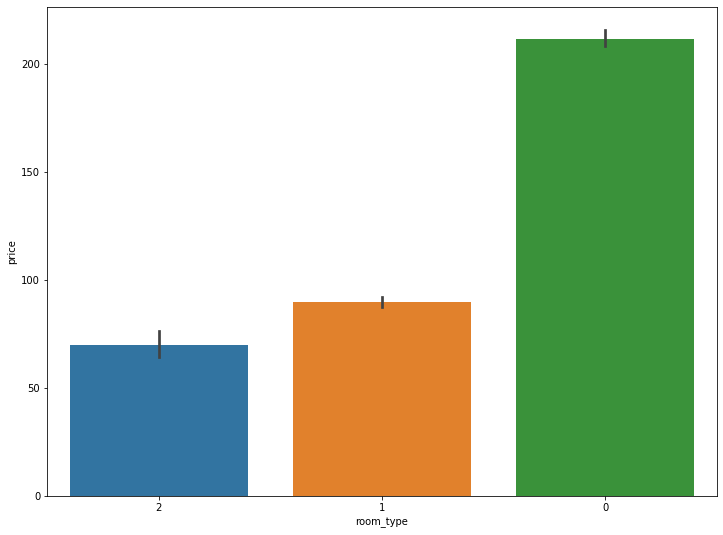

In [247]:
price_of_rooms = df.groupby(["room_type"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='room_type', y="price", data=df, order=result['room_type'])
plt.show()

### Reading and Analysing the plots

Following are my observations about the dataset:

1. Majority of the listings of of Airbnb are in Brooklyn and Manhattan.
2. Entire Home/Apartment are listed near Manhattan while Private Rooms near Brooklyn are almost same. 
3. Entire Home/ Apartment are the costliest among all the room types
4. Most of the listings are Entire home/ apartments and private rooms.

## Summary of Cross Validation

Since there is never enough data to train any model, removing any of it we risk losing important trends. So we divide the training data into several parts and each and every part is selected in turn as the testing data. For each k = 1,2,...K, the model with parameter lambda is fit to the other K − 1 parts, and the error is computed in predicting the last part. This is repeated for many values of lambda and the lambda value that makes CV the smallest is chosen. In this assignment, I've used 5 fold cross validation.

## Summary of Nonlinear Regression

Nonlinear regression is a form of regression analysis in which data is fit to a model. Simple linear regression relates two variables and gives a straight line y = mx + c while nonlinear regression will generate a curve. The main aim of the model is to make the sum of the squares as small as possible. The sum of squares is used to check how our observations are varying from the mean of the data set. The smaller the sum of these squared figures, the better the function fits the data points in the set.

# Neural Network

In [248]:
# standardization class
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu

In [249]:
from grad import scg, steepest
from copy import copy
from util import Standardizer


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

## Explanation of Codes

The two classes that are defined are Standardizer class and NeuralNet class.

1. The Standardizer class normalizes all the values.<br> <br>

2. NeuralNet class builds the neural network that learns the data through feed forward and back propagation.<br> <br>

3. The Pack function is used to pack multiple weights of each layer into one vector. The unpack function does the opposite of it. <br> <br>

4. Forward pass in neural network propagates as shown below:<br> <br>


$$
\begin{align}
Z &amp;= h(Xl \cdot V) \\
\\
Y &amp; = Zl \cdot W 
\end{align}
$$

5. The train function takes the feautures and the target as the input. The gradientf unpacks the weights,proceeds with the forward pass by calling forward function. Now error is calculated using results of forward pass. <br> <br>

6. The optimtarget function reduces the error by using the object function and updates the weights accordingly.<br> <br>

7. The use function is used for testing the data after training the model. Testing data is passed as parameter and it stadardizes the data. Then forward is applied on the data which returns the predictions. <br> <br>

In [250]:
from sklearn.metrics import mean_squared_error

# Cross Validation

In [251]:
#Splits into parts of 20% of whole data. So myList will give five 20% of 100% of data
def split(data):
    part = len(data) / 5.0
    mylistofdata = []
    x = 0.0
    #Iterate through the length of s and keep on appending to myList so we've like 5 parts now and return the list
    while x < len(data):
        mylistofdata.append(data[int(x):int(x + part)])
        x += part
    return mylistofdata

best_prm_list=[]
final_list=[]

def cross_validate(X, T, parameters):
    #Call Split and get the data partitioned
    X_part = split(X)
    T_part = split(T)
    
    #This loop iterates through all the 5 parts..so each i is like test data for the paritioned dataset 
    for i in range(5): 
        print("Test number: ",i)
        X_tst = X_part[i]
        T_tst = T_part[i]

        history_rmse=[]
        params=[] 
        #best_param
        
        #k is the validation part of the 5 parts
        for k in range(5): 
            print("K is : ",k)
            if i == k: 
                continue 
            
            #Another 20% of data used
            X_val = X_part[k]
            T_val = T_part[k]
            
            #Train will be those which is not test and validation part. The remaining 60% of data of 100%
            X_trn = X_part[not i and not k]
            T_trn = T_part[not i and not k]
            
            #m = 0
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(X_trn, T_trn)
                pred = model.use(X_val)
                
                valid_err = np.sqrt(mean_squared_error(T_val, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
                
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        X_trn = X_part[not i]
        T_trn = T_part[not i]
        best_model.train(X_trn, T_trn)

        final_pred = best_model.use(X_tst)
        final_err = np.sqrt(mean_squared_error(T_tst, final_pred))
        final_list.append(final_err)
        best_prm_list.append(best_param)

    return final_list,best_prm_list

## Explanation of Codes

The cross_validate function takes X that has the sample, T which has the target values of the samples and model parameters which is taken as input. This function returns final_list and best_prm_list. The data is divided into 5 partitions using split function. X_part and T_part are used to store the partitions. Each element of these lists are 20% of the original data size. <br><br>
Split function is dividing the data into partitions. Here it will partition parts of 20% of whole data. So myListofdata will give five 20% of 100% of data. We iterate through the length of s (data) and keep on appending to myListofdata so we've like 5 parts now and we will return the list.<br><br>
k is the validation part of the 5 parts. Excluding k and i the rest data is our training set.

In each validation loop we are training data with our different parameters passed and evaluating on validation data. Each parameter returns rmse value and this is appended to rmselist, parameters respective to that rmse are appended into paramlist to keep track of indices. Now after each validation we are selecting the parameter that produced minimum rmse value and storing the results into history_rmse and params list.

From this history_rmse list we are picking one with best results. Now the model is retrained with the best parameter param in parameters and the model is applied to test set. This test accuracy is appended to final_list and parameters are appended to best_paramlist. This operation runs for 5 folds and cross validate function returns final_list and best_prm_list which are best Accuracies of each test and best Params of each test.

From this results we choose the parameters that is repeated more number of times in best_prm_list.

## Presentation of CV Result

In [252]:
models = [[11,3,1],[11,5,1],[11,7,1], [11,10,1], [11,12,1]]

bestAccuracy,bestParam = cross_validate(np.array(df), np.array(df_target), models)

Test number:  0
K is :  0
K is :  1


C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 10, 1], [11, 12, 1]]
[10.610644084298993, 10.974904390204813, 6.791952235775226, 5.6780202293745266, 9.173339368785545]
5.6780202293745266
[11, 10, 1]
K is :  2


C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 10, 1], [11, 12, 1]]
[11.311522123339804, 8.83583625834638, 16.96549754691054, 12.149993836761562, 9.797816920267362]
8.83583625834638
[11, 5, 1]
K is :  3


C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 10, 1], [11, 12, 1]]
[16.43790365719602, 18.929390458640388, 22.610834715809748, 40.3822814250749, 21.11930938514743]
16.43790365719602
[11, 3, 1]
K is :  4


C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 10, 1], [11, 12, 1]]
[78.83853331236074, 81.47729076569152, 148.73653479050418, 80.1417779910885, 73.00948601268333]
73.00948601268333
[11, 12, 1]
[[11, 10, 1], [11, 5, 1], [11, 3, 1], [11, 12, 1]]
[5.6780202293745266, 8.83583625834638, 16.43790365719602, 73.00948601268333]
[11, 3, 1]


C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Test number:  1
K is :  0


C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 10, 1], [11, 12, 1]]
[13.367698792902505, 3.993029610559795, 2.1541737445891176, 1.6806359377859819, 2.153035120564485]
1.6806359377859819
[11, 10, 1]
K is :  1
K is :  2


C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 10, 1], [11, 12, 1]]
[13.945349426146047, 5.1520888205956235, 9.364358475622977, 7.981293603553924, 9.104403300438342]
5.1520888205956235
[11, 5, 1]
K is :  3


C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 10, 1], [11, 12, 1]]
[25.283421845615763, 69.2706031730605, 64.99493161815393, 31.989634710564516, 42.79769743274862]
25.283421845615763
[11, 3, 1]
K is :  4


C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 10, 1], [11, 12, 1]]
[19.28092679899255, 350.4951597711076, 37.611618487199706, 23.798937366368268, 58.42244069683213]
19.28092679899255
[11, 3, 1]
[[11, 10, 1], [11, 5, 1], [11, 3, 1], [11, 3, 1]]
[1.6806359377859819, 5.1520888205956235, 25.283421845615763, 19.28092679899255]
[11, 3, 1]


C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Test number:  2
K is :  0


C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 10, 1], [11, 12, 1]]
[13.944186741278205, 11.927065848289278, 4.775926433184597, 3.3594314865345156, 2.111070230123707]
2.111070230123707
[11, 12, 1]
K is :  1


C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 10, 1], [11, 12, 1]]
[15.993926785392707, 10.106999927104612, 9.347120986346733, 4.694270303656795, 6.838243694815711]
4.694270303656795
[11, 10, 1]
K is :  2
K is :  3


C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 10, 1], [11, 12, 1]]
[17.348403066317054, 43.11920514180452, 24.534630086904595, 21.072259762699943, 37.7444805537564]
17.348403066317054
[11, 3, 1]
K is :  4


C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 10, 1], [11, 12, 1]]
[13.541426734245375, 364.78697447380694, 59.11486439958478, 246.22919823201863, 46.5184647248216]
13.541426734245375
[11, 3, 1]
[[11, 12, 1], [11, 10, 1], [11, 3, 1], [11, 3, 1]]
[2.111070230123707, 4.694270303656795, 17.348403066317054, 13.541426734245375]
[11, 3, 1]


C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Test number:  3
K is :  0


C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 10, 1], [11, 12, 1]]
[7.48087324694547, 2.7947855083370947, 2.457889908134464, 2.0160275126813234, 2.061671694468676]
2.0160275126813234
[11, 10, 1]
K is :  1


C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 10, 1], [11, 12, 1]]
[5.5022289496879955, 9.802508408839579, 6.319662000010568, 4.702461314221952, 7.2715302048413175]
4.702461314221952
[11, 10, 1]
K is :  2


C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 10, 1], [11, 12, 1]]
[9.327874386066236, 8.733659556290597, 11.328165128633241, 12.1846785532397, 10.43787406717903]
8.733659556290597
[11, 5, 1]
K is :  3
K is :  4


C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 10, 1], [11, 12, 1]]
[102.24690581310888, 352.85415287521266, 211.44128055869703, 38.842961760977275, 125.5462869046998]
38.842961760977275
[11, 10, 1]
[[11, 10, 1], [11, 10, 1], [11, 5, 1], [11, 10, 1]]
[2.0160275126813234, 4.702461314221952, 8.733659556290597, 38.842961760977275]
[11, 3, 1]


C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Test number:  4
K is :  0


C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 10, 1], [11, 12, 1]]
[6.554964128446773, 6.573673896129992, 3.702724609714396, 1.8276674700084674, 1.7377903176557445]
1.7377903176557445
[11, 12, 1]
K is :  1


C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 10, 1], [11, 12, 1]]
[13.002551096516788, 12.104243241191453, 5.945369831097174, 5.647908247961401, 7.200590593148895]
5.647908247961401
[11, 10, 1]
K is :  2


C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 10, 1], [11, 12, 1]]
[20.92113077799701, 12.297408783173166, 7.783797154354982, 12.441919884493227, 6.937070395084449]
6.937070395084449
[11, 12, 1]
K is :  3


C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 10, 1], [11, 12, 1]]
[22.39407520918759, 33.70926365332464, 97.18853488846226, 29.425218096403288, 20.974316695845552]
20.974316695845552
[11, 12, 1]
K is :  4
[[11, 12, 1], [11, 10, 1], [11, 12, 1], [11, 12, 1]]
[1.7377903176557445, 5.647908247961401, 6.937070395084449, 20.974316695845552]
[11, 3, 1]


C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [253]:
from sklearn import model_selection

In [254]:
print(bestAccuracy,bestParam)

[29.064925908093006, 11.740903135950811, 11.891151856924507, 12.431802040431377, 77.69295141944612] [[11, 3, 1], [11, 3, 1], [11, 3, 1], [11, 3, 1], [11, 3, 1]]


In [255]:
X_trn,X_tst,y_trn,y_tst = model_selection.train_test_split(np.array(df),np.array(df_target),test_size=0.30,random_state=40)

In [256]:
model=NeuralNet([11,12,1])  
#choosing parameters which occured more number of times on the final parameter list
#because those are the list with mininmum rmse
model.train(X_trn,y_trn,niter=1000)

C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


{'w': array([-3.60166919e-01,  2.47584178e+00,  9.30639289e-01,  9.51126480e-02,
        -1.76432724e-02,  4.19259735e-01,  7.24534510e-01, -3.50606480e-01,
        -7.65775471e-01, -4.15321176e-01,  7.53748817e-02, -1.74418948e+00,
        -6.24899476e-03,  9.48138903e-02, -5.46966508e-03,  1.87341758e-02,
        -1.52753244e-02, -1.04167783e-02, -1.39469854e-02,  8.75897488e-03,
        -1.75253353e-02, -2.35876243e-02, -3.01994016e-02,  1.12954030e-02,
        -2.00057731e-02, -2.17346713e-02, -5.42346742e-02, -1.74870116e-02,
         1.37026410e-02,  4.32010140e-02, -2.43076120e-02, -2.35840963e-02,
         3.75396346e-02, -9.03504047e-03, -1.88333163e-02, -5.11203196e-03,
         3.31994212e-02,  9.80928717e-02,  2.40727789e-02,  1.44621344e-02,
        -1.68798955e-02, -3.89466963e-02,  7.03898611e-03,  3.29193701e-02,
        -9.84743319e-03, -2.13266640e-02,  1.11202084e-02, -1.16837276e-02,
        -4.21807597e-02, -7.36119583e-02, -5.93478091e-02, -2.07074418e-02,
       

In [257]:
y_pred=model.use(X_tst)

In [258]:
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(y_tst, y_pred)))
print('R squared value:', r2_score(y_tst, y_pred))

RMSE: 10.175276318903277
R squared value: 0.9985824749185555


## Plot of Results

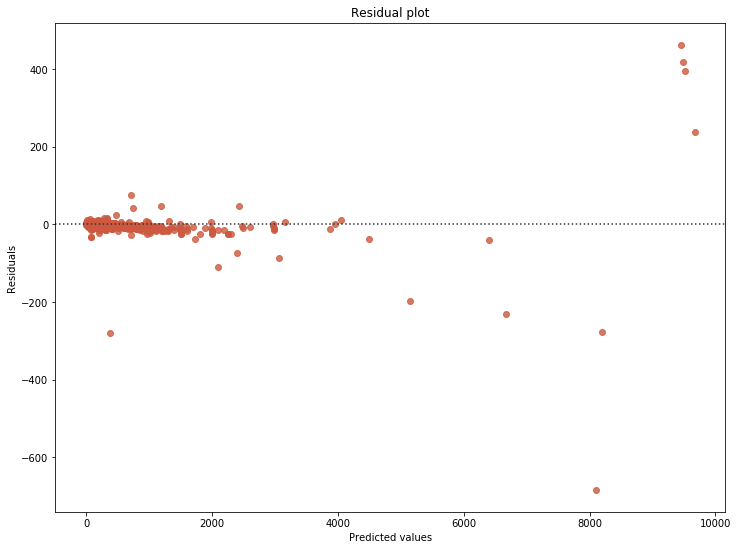

In [259]:
sns.residplot(y_pred.flatten(), y_tst.flatten(), color=(0.8, 0.35, 0.25))
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals');

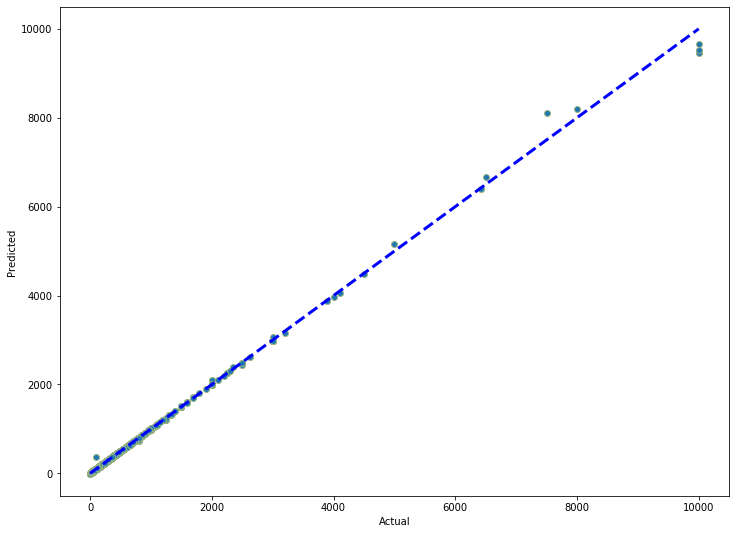

In [260]:
fig, ax = plt.subplots()
ax.scatter(y_tst, y_pred, edgecolors=(0.6,0.7,0.5))
ax.plot([y_tst.min(), y_tst.max()], [y_tst.min(), y_tst.max()],'b--', lw=3)
ax.set_ylabel('Predicted')
ax.set_xlabel('Actual')
plt.show()

Text(0.5, 1.0, 'NN model predictions')

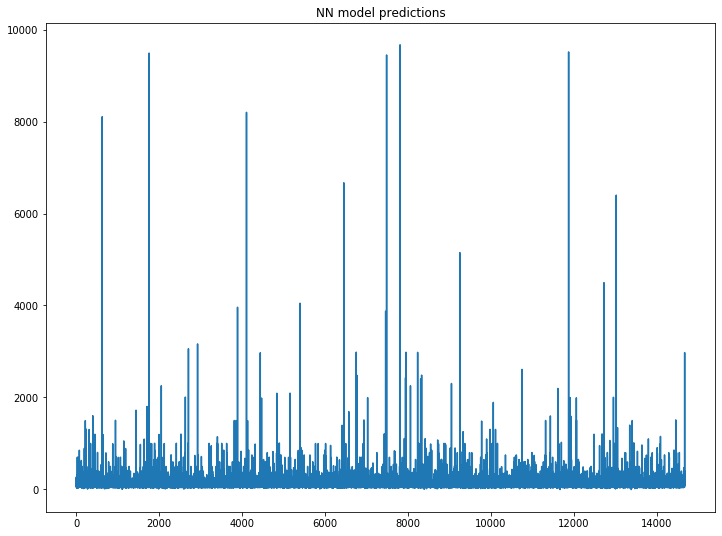

In [261]:
plt.plot(y_pred)
plt.title("NN model predictions")

## Discussions about parameter/network structure choice

### Explanation of CV Results

I have built a 3 layer neural network. Input layer has 11 nodes because there are 11 features in my data. Output layer has 1 node.<br><br>
I tried for the best network structure by changing the number of nodes in hidden layer. I have performed 5 fold cross validation by passing my models variable as  [[11, 7, 1], [11, 3, 1], [11, 3, 1], [11, 3, 1], [11, 3, 1]]. The first value here represents input nodes, second value represents nodes in hidden layer, third value represents output nodes.
We can clearly find out that the model [11,12,1] has appeared more number of times. <br><br>
The rmse values returned for [11, 12, 1] in the final result are [1.7529763322645415, 6.268476056862809, 9.333375322551655, 10.361224733379588]<br><br>
The model with number of nodes in hidden layer 3 works better. Hence, I've used [11,12,1] as the final structure.

### Discussions about Prediction results

In this particular assignment I have done regression analysis using Neural network which is non linear regression problem. On training the model using NeuralNet with optimum structure [11,12,1], model has produced a RMSE: 11.184980283010352 R squared value: 0.9982871916391842. <br><br>

We can choose hidden layers, hidden nodes that suits our problem. Each node is connected to a activation function which makes the network more powerful. I used tanh as activation function. The gradient is updating the weights in each layer during back propagation which made network work so well.<br><br>

I tried with 11 layers and 1000 iterations I got R squared value around 0.00012. There's a strange variation in results obtained by this dataset. 

# Nonlinear Logistic Regression

## Data Description

The dataset for the classification is taken from the UCI Machine Learning repository. The dataset consists of census information of about 49k people earning in some capacity. The following are the attributes of the dataset:

1. Age, Continuous

2. Workclass, of the person

3. fnlwgt, final weight, continuous

4. education, of the person, as an object

5. education-num

6. marital-status, of the person

7. occupation, of the person

8. relationship, of the person

9. race, of the person

10. sex

11. capital-gain

12. capital-loss

13. hours-per-week

14. native country

15. Salary, of the person

In [291]:
df= pd.read_csv('adult.data',names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary'])
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [292]:
#There are so many object data types which we need to convert into int data types for the preprocessing to take place.

salary_map={' <=50K':1,' >50K':-1}
df['Salary']=df['Salary'].map(salary_map).astype(int)

df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,1
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,-1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,-1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,-1


In [293]:
#Convert sex into integer

df['sex'] = df['sex'].map({' Male':1,' Female':0}).astype(int)

In [294]:
#df.drop('education','fnlwgt', axis=1, inplace=True)
df.drop(columns=['fnlwgt', 'education'], inplace=True)

In [295]:
df.shape
df['native-country'] = df['native-country'].replace(' ?',np.nan)
df['workclass'] = df['workclass'].replace(' ?',np.nan)
df['occupation'] = df['occupation'].replace(' ?',np.nan)

df.dropna(how='any',inplace=True)
df.shape

(30162, 13)

In [296]:
for ds in [df]:
    ds.loc[ds['native-country'] != ' United-States', 'native-country'] = 'Non-US'
    ds.loc[ds['native-country'] == ' United-States', 'native-country'] = 'US'

In [297]:
#Converting country into integer

df['native-country'] = df['native-country'].map({'US':1,'Non-US':0}).astype(int)

In [298]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['race'])
df['race']=le.transform(df['race'])
le.fit(df['workclass'])
df['workclass']=le.transform(df['workclass'])
le.fit(df['marital-status'])
df['marital-status']=le.transform(df['marital-status'])
le.fit(df['occupation'])
df['occupation']=le.transform(df['occupation'])
le.fit(df['relationship'])
df['relationship']=le.transform(df['relationship'])

In [299]:
df.head(10)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,5,13,4,0,1,4,1,2174,0,40,1,1
1,50,4,13,2,3,0,4,1,0,0,13,1,1
2,38,2,9,0,5,1,4,1,0,0,40,1,1
3,53,2,7,2,5,0,2,1,0,0,40,1,1
4,28,2,13,2,9,5,2,0,0,0,40,0,1
5,37,2,14,2,3,5,4,0,0,0,40,1,1
6,49,2,5,3,7,1,2,0,0,0,16,0,1
7,52,4,9,2,3,0,4,1,0,0,45,1,-1
8,31,2,14,4,9,1,4,0,14084,0,50,1,-1
9,42,2,13,2,3,0,4,1,5178,0,40,1,-1


In [300]:
y_dframe=df['Salary']
dframe_lr=df.drop(['Salary'],axis=1)
from sklearn import model_selection
from sklearn.metrics import r2_score

In [301]:
df.head(5)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,5,13,4,0,1,4,1,2174,0,40,1,1
1,50,4,13,2,3,0,4,1,0,0,13,1,1
2,38,2,9,0,5,1,4,1,0,0,40,1,1
3,53,2,7,2,5,0,2,1,0,0,40,1,1
4,28,2,13,2,9,5,2,0,0,0,40,0,1


### Plots to visualize data

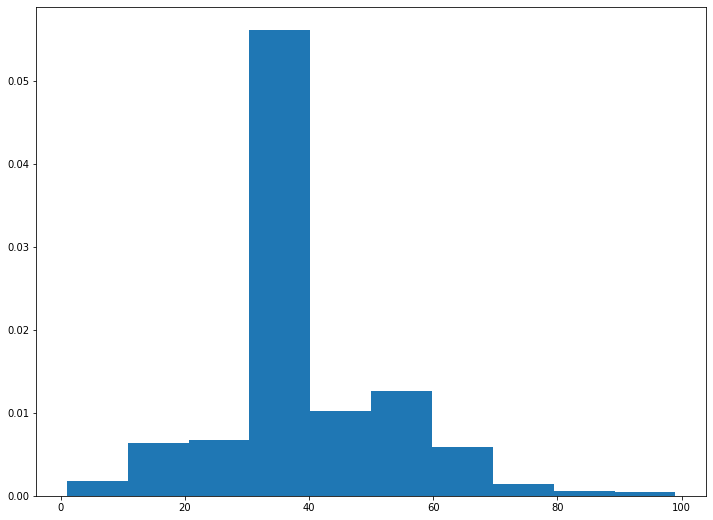

In [302]:
x= df['hours-per-week']
plt.hist(x,bins=None,density=True,normed=None,histtype='bar')
plt.show()

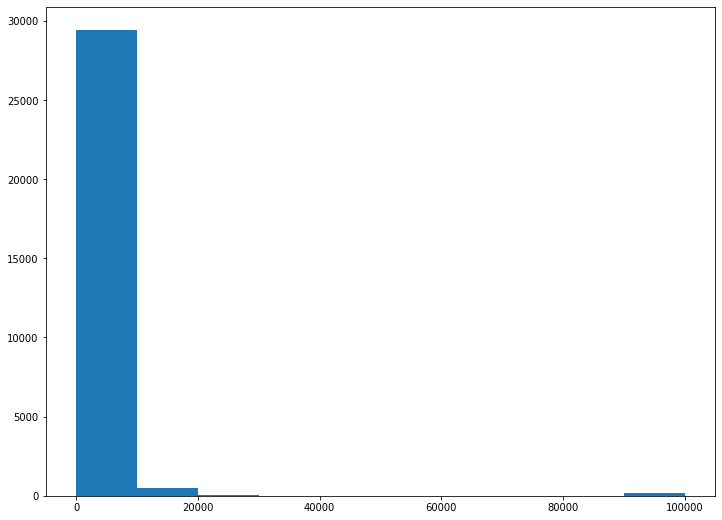

In [303]:
x=df['capital-gain']
plt.hist(x,bins=None,normed=None)
plt.show()

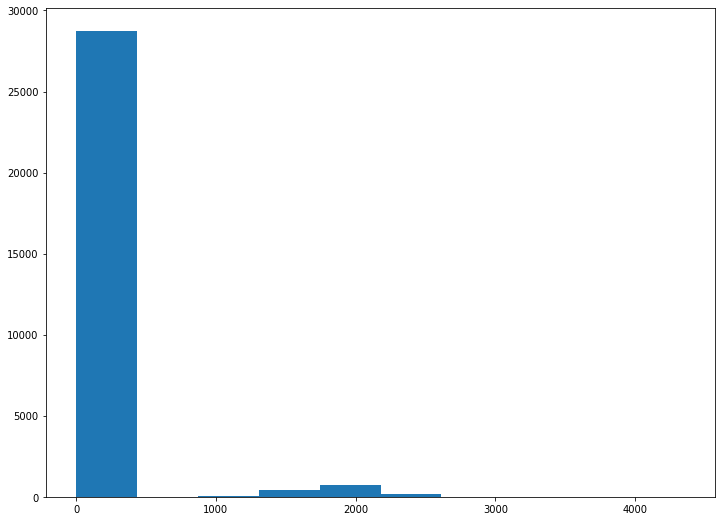

In [304]:
x=df['capital-loss']
plt.hist(x,bins=None,normed=None)
plt.show()

### Reading and analysing the plots

1. The education and education-num columns are kind of equivalent. education-num is the numerical equivalent of education. Some of the variables have missing values such as native-country. I have preprocessed it by removing all the null values in that column.
2. It has been noticed that income varies greatly across different occupations. Nearly half of Professional occupation makes greater than $50,000 a year, while that percentage is only 13% for Service occupation.
3. capital_gain and capital_loss are two continuous variables describing income and loss from financial investments. Histograms show that the distributions of these two variables are both highly screwed

In [305]:
df.head(5)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,5,13,4,0,1,4,1,2174,0,40,1,1
1,50,4,13,2,3,0,4,1,0,0,13,1,1
2,38,2,9,0,5,1,4,1,0,0,40,1,1
3,53,2,7,2,5,0,2,1,0,0,40,1,1
4,28,2,13,2,9,5,2,0,0,0,40,0,1


## Summary of Nonlinear Logistic Regression

The linear logistic regression that uses the softmax layer for classification along with a linear model. In nonlinear logistic regression extra layers are added called as hidden layers. With the inclusion of hidden layer the softmax function is used in the last layer. Till then the input layer passes its output to hidden layer, then the hidden layer to another hidden layer or softmax function and the softmax function then gives the output.

$$
wv_j \leftarrow wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(xv_n)\Big) xv_n.
 $$

In [306]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        NeuralNet.__init__(self, nunits)

    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        exp_z = np.exp(z) 
        return exp_z / (np.sum(exp_z, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(exp_z))

    
    def forward(self, X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
                t=self.softmax(t)
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
        return (t, Z)
                

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        return -(np.sum(T*(np.log(Y)))+wpenalty)

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')
                
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(X)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(X)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)
            
        if optim == 'scg':
            res = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(res['w'][:])
            self.f = res['f']
        elif optim == 'steepest':
            res = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(res['w'][:])
        if ftracep:
            self.ftrace = res['ftrace']
        if 'reason' in res.keys() and verbose:
            print(res['reason'])

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        Y, Z = self.forward(X)
        l=np.argmax(Y,1)
        return Y,l

## Explanation of Code

The NeuralNetLogReg contains the following functions:

1. init function is a constructor of the class which calls the NeuralNet class' constructor for assigning values to nLayers i.e the number of layers for the model.<br><br>
2. _nLayers is the number of hidden unit layers.<br><br>
3. rho is the learning rate attribute of the class.<br><br>
4. The train function takes the feautures and the target as the input. The gradientf unpacks the weights and it proceeds with the forward pass by calling forward function. Now error is calculated using results of forward pass. Now back propagation is proceeded by calling backward function with parameters as error, Z, T(Target), _lambda.<br><br>
5. Forward pass in neural network propagates same as in the class discussed above the only difference is that and an additional t=self.softmax(t) is added to the last layer. The last layer will be the softmax function which then gives output to the output layer.

In [307]:
def add_ones(w):
    return np.hstack((np.ones((w.shape[0], 1)), w))

In [308]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [309]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [310]:
from sklearn.metrics import roc_curve, auc

## Testing model with Toy Data

Text(0.5, 1.0, 'test data set')

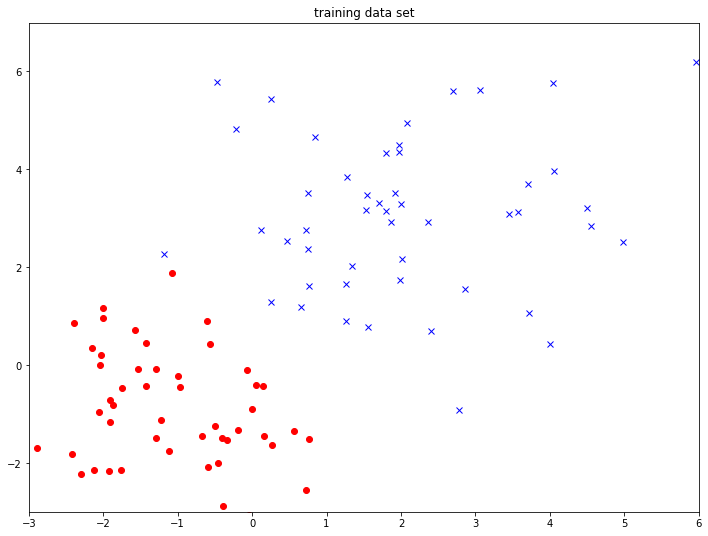

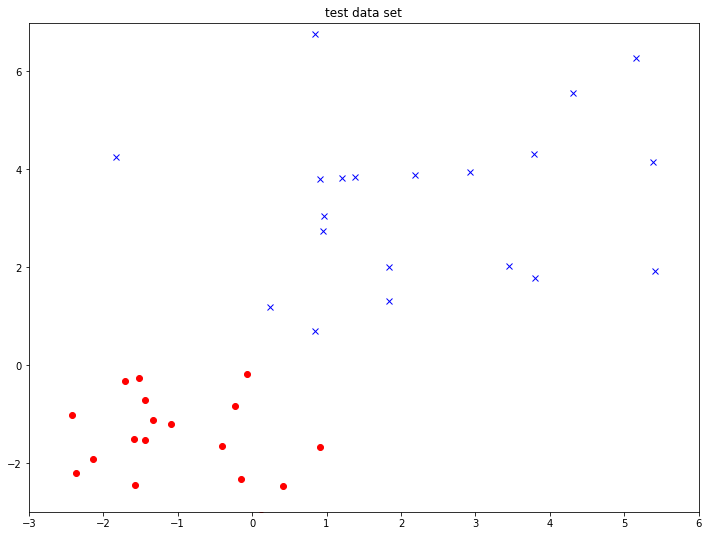

In [311]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")

In [312]:
clsf = NeuralNetLogReg([2, 4, 2])
clsf.train(Xtrain, Ttrain)
classes, Y = clsf.use(Xtest)

C:\Users\Gopal\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


In [313]:
Y

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [314]:
classes

array([[0.48292183, 0.51707817],
       [0.48269813, 0.51730187],
       [0.47994172, 0.52005828],
       [0.49173903, 0.50826097],
       [0.48866365, 0.51133635],
       [0.49253303, 0.50746697],
       [0.5017529 , 0.4982471 ],
       [0.48589997, 0.51410003],
       [0.49977799, 0.50022201],
       [0.49402135, 0.50597865],
       [0.49538983, 0.50461017],
       [0.48787514, 0.51212486],
       [0.49153282, 0.50846718],
       [0.48349062, 0.51650938],
       [0.50461147, 0.49538853],
       [0.49332079, 0.50667921],
       [0.49425164, 0.50574836],
       [0.48923249, 0.51076751],
       [0.48944626, 0.51055374],
       [0.49395383, 0.50604617],
       [0.51552487, 0.48447513],
       [0.5377811 , 0.4622189 ],
       [0.55556213, 0.44443787],
       [0.56028736, 0.43971264],
       [0.51474745, 0.48525255],
       [0.5373528 , 0.4626472 ],
       [0.5286863 , 0.4713137 ],
       [0.53495095, 0.46504905],
       [0.52788233, 0.47211767],
       [0.54919178, 0.45080822],
       [0.

Accuracy:  50.0 %


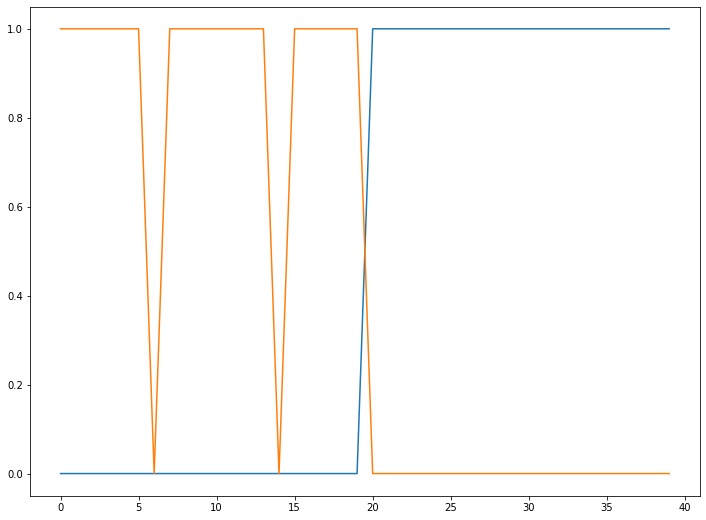

In [315]:
plt.plot(Ttest)
plt.plot(Y)

print("Accuracy: ", 100 - np.mean(np.abs(Ttest - Y)) * 100, "%")

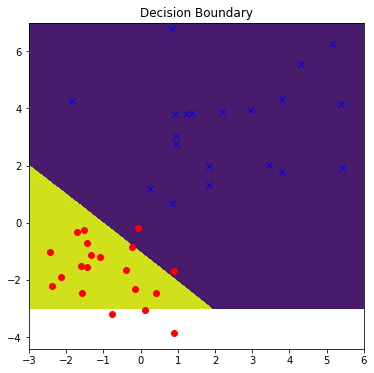

In [316]:
x = np.linspace(-3, 6, 1000)
y = np.linspace(-3, 7, 1000)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T
classes, _ = clsf.use(X)
zs = _.reshape(xs.shape)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary")

plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

## Discussion about Toy Data

The code works well with 50% accuracy. Hence, we can say that our NeuralNetLogReg class is working.

## Testing on Classification Dataset

In [317]:
XTrain, XTest, YTrain, YTest = model_selection.train_test_split(dframe_lr, y_dframe,test_size=0.20,random_state=42)

In [318]:
T = add_ones(np.array(YTrain).reshape(-1,1))
T=T.astype(int)
T[:,0]=T[:,1]
T[T[:,0]==1]=0
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==-1]=1
T[T==-1]=0

In [319]:
nn = NeuralNetLogReg([12,4,2])
nn.train(sc.fit_transform(XTrain), T, niter=1000) 
p,l = nn.use(sc.fit_transform(XTest))

C:\Users\Gopal\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in multiply


## Plots and Results

In [320]:
y_test=np.where(YTest==-1,0,1)
print('F1 score:', f1_score(y_test, l))
print('Accuracy:', accuracy_score(y_test, l))

F1 score: 0.9032670001064169
Accuracy: 0.8493286921929388


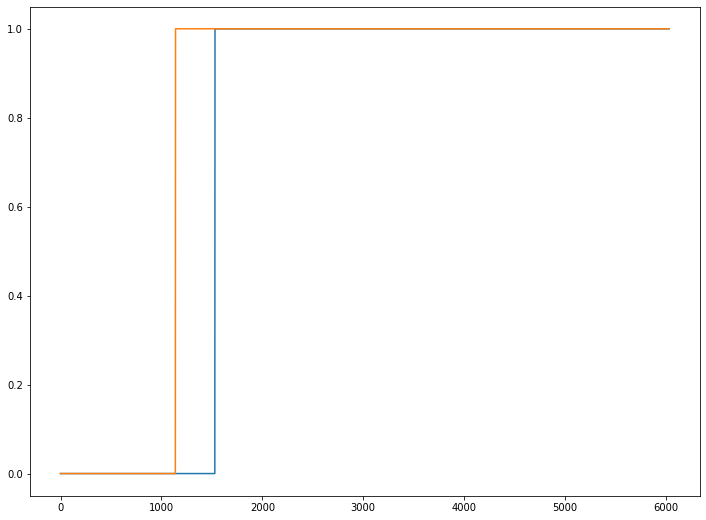

In [321]:
plt.plot(np.sort(y_test))
plt.plot(np.sort(l))

In [322]:
cf3=confusion_matrix(y_test, l)
cf3
TP=cf3[1][1]
TN=cf3[0][0]
FN=cf3[1][0]
FP=cf3[0][1]

In [323]:
precision=TP/(TP+FP)
specificity=TN/(TN+FP)
recall=TP/(TP+FN)

In [324]:
print('Precision: ' ,precision)
print('Specificity: ' ,specificity)
print('Recall: ' ,recall)

Precision:  0.8671843073150797
Specificity:  0.5751633986928104
Recall:  0.94248278925161


Text(0.5, 1, 'Confusion Matrix')

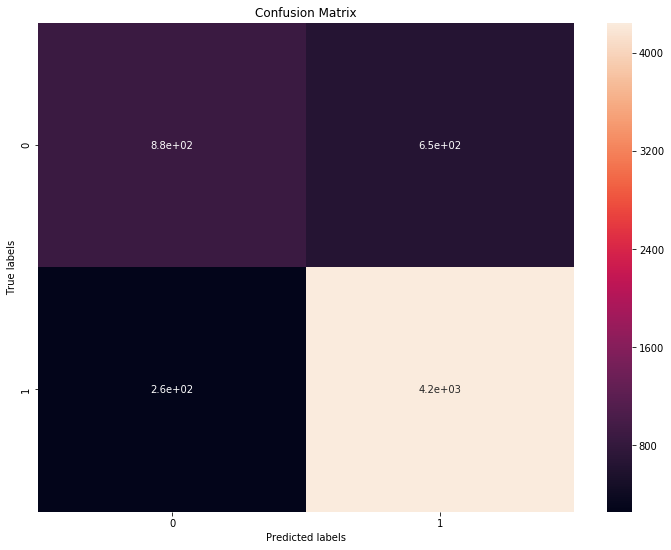

In [325]:
ax= plt.subplot()
sns.heatmap(cf3, annot=True, ax = ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')

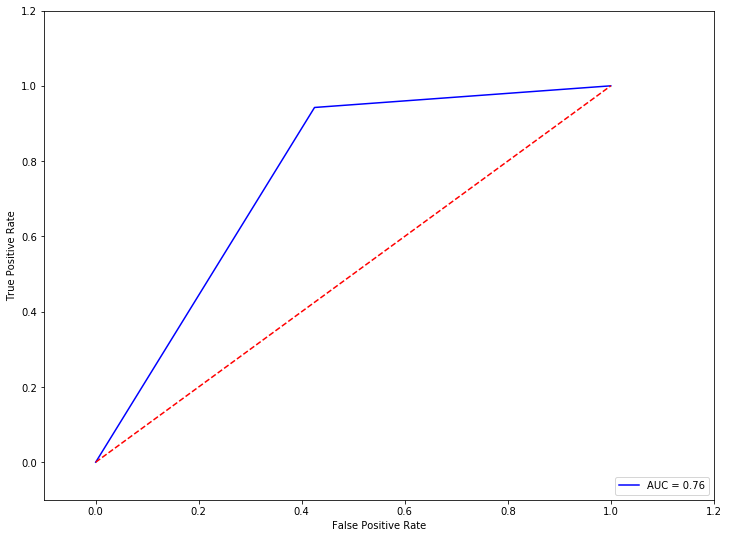

In [326]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, l)
roc_auc = auc(false_positive_rate, true_positive_rate)


##Plotting now
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

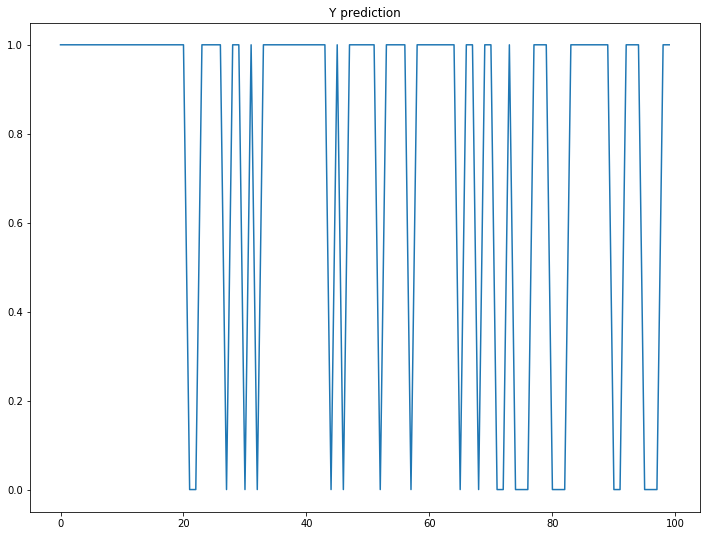

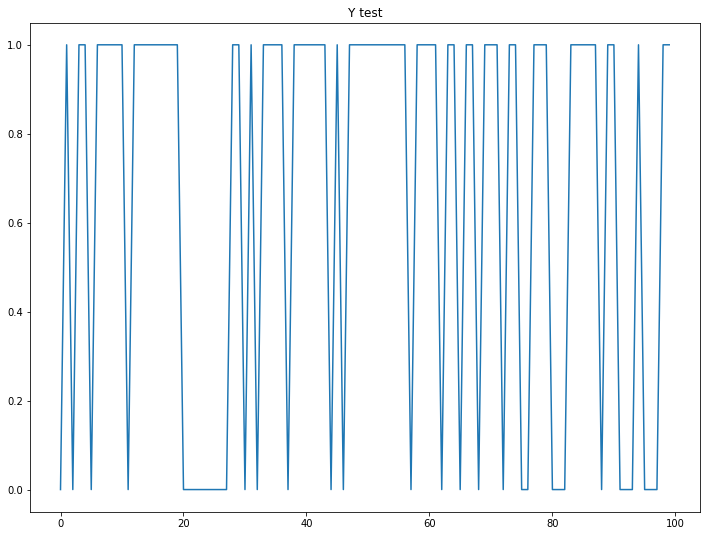

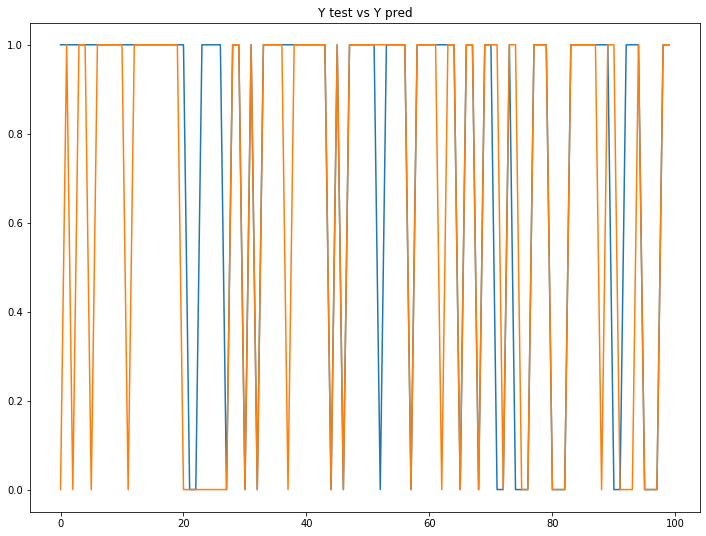

In [327]:
plt.title("Y prediction")
plt.plot(l[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(y_test[0:100]))
plt.show()
plt.title("Y test vs Y pred")
plt.plot(l[0:100])
plt.plot(np.array(y_test[0:100]))
plt.show()

## Cross validation code for nonlinear logistic regression

In [328]:
def split(s):
    avg = len(s) / 5.0
    out = []
    last = 0.0
    while last < len(s):
        out.append(s[int(last):int(last + avg)])
        last += avg
    return out

final_list=[]
best_paramlist=[]
def cross_validate(X, T, parameters):
    partX = split(X)
    partT = split(T)
    for test in range(5): 
        print("test",test)
        Xtst = partX[test]
        Ttst = partT[test]
        j = 0
        
        history_rmse=[]
        params=[]
        for val in range(5): 
            print("val",val)
            if test == val: continue
            
            Xval = partX[val]
            Tval = partT[val]
            
            Xtrn = partX[not test and not val]
            Ttrn = partT[not test and not val]
            
            i = 0
            flist=[]
            paramlist=[]
            for param in parameters:
                
                model = NeuralNetLogReg(param)
                model.train(Xtrn, Ttrn)
                prob,pred = model.use(Xval)
                Tval1=Tval[:,0]
                Tval1=np.where(Tval1==0,1,0)
                valAcc = f1_score(Tval1, pred)
                flist.append(valAcc)
                paramlist.append(param)
            print(flist)
            print(paramlist)
            #avg=sum(rmselist)/len(rmselist)
            #history_rmse.append(avg)
            print(max(flist))
            print(paramlist[np.argmax(flist)])
            history_rmse.append(max(flist))
            params.append(paramlist[np.argmax(flist)])
        print("history_rmse",history_rmse)
        print("params",params)
        #print(rmselist)
        print(history_rmse)
        print(params)
        bestParam = params[np.argmax(history_rmse)]
        print(bestParam)
        bestModel = NeuralNetLogReg(bestParam)
        
        Xtrn = partX[not test]
        Ttrn = partT[not test]
        bestModel.train(Xtrn, Ttrn)

        prob1,finalPred = bestModel.use(Xtst)
        Ttst1=Ttst[:,0]
        Ttst1=np.where(Ttst1==0,1,0)
        myf1 = f1_score(Ttst1, finalPred)
        final_list.append(myf1)
        best_paramlist.append(bestParam)

    return final_list,best_paramlist

In [329]:
T = add_ones(np.array(y_dframe).reshape(-1,1))
T=T.astype(int)
T[:,0]=T[:,1]
T[T[:,0]==1]=0
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==-1]=1
T[T==-1]=0

In [330]:
models = [[12,5,2], [12,7,2],[12,9,2], [12,12,2]]
bestAccuracy,bestParam = (cross_validate(np.array(dframe_lr), T, models))

test 0
val 0
val 1


C:\Users\Gopal\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in multiply


[0.8782236383550732, 0.8790290489454835, 0.8775286497259591, 0.8780635400907717]
[[12, 5, 2], [12, 7, 2], [12, 9, 2], [12, 12, 2]]
0.8790290489454835
[12, 7, 2]
val 2
[0.8791549568756661, 0.8660632563815722, 0.875251509054326, 0.8788524907927894]
[[12, 5, 2], [12, 7, 2], [12, 9, 2], [12, 12, 2]]
0.8791549568756661
[12, 5, 2]
val 3
[0.8767640628105744, 0.8764132553606239, 0.8878580072609924, 0.875390015600624]
[[12, 5, 2], [12, 7, 2], [12, 9, 2], [12, 12, 2]]
0.8878580072609924
[12, 9, 2]
val 4
[0.8747738693467337, 0.8706930693069306, 0.871904812948869, 0.8810833685992383]
[[12, 5, 2], [12, 7, 2], [12, 9, 2], [12, 12, 2]]
0.8810833685992383
[12, 12, 2]
history_rmse [0.8790290489454835, 0.8791549568756661, 0.8878580072609924, 0.8810833685992383]
params [[12, 7, 2], [12, 5, 2], [12, 9, 2], [12, 12, 2]]
[0.8790290489454835, 0.8791549568756661, 0.8878580072609924, 0.8810833685992383]
[[12, 7, 2], [12, 5, 2], [12, 9, 2], [12, 12, 2]]
[12, 9, 2]
test 1
val 0
[0.8782532410566333, 0.87736510161

## Testing with Optimum parameters

In [331]:
print(bestAccuracy)
print(bestParam)

[0.8771827138815724, 0.8786460925833749, 0.8795040681906239, 0.8736989591673339, 0.8756218905472638]
[[12, 9, 2], [12, 7, 2], [12, 9, 2], [12, 7, 2], [12, 9, 2]]


In [332]:
T = add_ones(np.array(YTrain).reshape(-1,1))
T=T.astype(int)
T[:,0]=T[:,1]
T[T[:,0]==1]=0
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==-1]=1
T[T==-1]=0

In [333]:
nn = NeuralNetLogReg([12,12,2])
nn.train(sc.fit_transform(XTrain), T,optim='scg') 
p,l = nn.use(sc.fit_transform(XTest))

C:\Users\Gopal\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in multiply


In [334]:
y_pred1=l
y_test1=np.where(YTest==-1,0,1)
print('F1 score:', f1_score(y_test1, y_pred1))
print('Accuracy:', accuracy_score(y_test1, y_pred1))

F1 score: 0.9029001074113856
Accuracy: 0.8501574672633847


## Discussions about parameter/network structure choice

I have built a 5 layer neural network in this assignment. Input layer has 12 nodes as I have 12 features in my data. Output layer has 2 nodes.<br><br>
I tried for the best network structure by changing the number of nodes in hidden layer. I performed 5 fold cross validation by passing my models variable as [[12,5,2], [12,7,2],[12,9,2], [12,12,2]]. Here first value represents input nodes, second value represents nodes in hidden layer, third value represents output nodes. 
From the results of cross validation we can see that model [12,12,2] has appeared more number of times. The f1 score values returned for [12,12,2] in the final result are [0.8675483214649033, 0.8746613146011039, 0.8640747737894006, 0.8769574944071589].<br><br>
The model with number of nodes in hidden layer 12 works better. With increasing layer the model keeps on improving With more number of nodes in hidden layer network its overfitting the data.

## Discussion about the Prediction Results

I have performed nonlinear logistic regression analysis using Neural network which is nonlinear regression problem. On training the model using NeuralNetLogReg with optimum structure [12,12,2], model has produced F1 score: 0.9067961165048544 and Accuracy: 0.8567876678269518 with optim="scg."<br><br>
We can choose hidden layers, hidden nodes that suits our problem. Each node is connected to a activation function which makes the network more powerful. I used softmax as activation function at last layer. The gradient is updating the weights in each layer during back propagation which made network work so well.<br><br>
I tried with 12 layers and I got 0.8567876678269518 as accuracy. The model is behaving well for increasing number of layers. This means that with more layers the model will give more accuracy.

# Conclusions

I got a great opportunity to learn Neural Network by completing this assignment. I learned how to implement K-fold Cross Validation without using any libraries. I learnt how important it is to preprocess the data before implementing it.<br>
Cross validation was really tough to implement. I faced many problems on keeping tracks of all the list used inside the cross validations also keeping track of all the indices took a lot of time to understand and implement.

## References

Professor's notebook : https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-NonlinearLogReg.ipynb

# Extra Credit

Now you are testing various **activation functions** in this section. Use the best neural network structure and explore 3 different activation functions of your choice (one should be *tanh* that you used in the previous sections). 
You should use cross validation to discover the best model (with activation function). 


One extra credit is assigned when you finish the work completely. 


# How to start?

* Download [a3.tgz](http://webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/a3.tgz). 
* Unzip the python files to current working directory.
* Import the necessary classes or functions including NeuralNet.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
40 | Methods | 
 | 10| Summary of CV & correctness of implementation
 | 5| Summary of nonlinear regression 
 | 5| Explanation of codes
 | 5| Summary of nonlinear logistic regression 
 | 5| Explanation of codes
 |10| Examination of correct implementation (NonlinearLogReg) with toy data.
40 | Results | Your Data
| 10| Presentaion of CV results
| 10| Discussions about parameter/network structure choice 
| 10| plots for results
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 
